In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import fbprophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from datetime import datetime

Importing plotly failed. Interactive plots will not work.


In [2]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [3]:
#read data
df = pd.read_csv(r'C:\Users\I539797\Documents\Thesis\Datasets\Formatted Datasets\formatted_amsterdam.csv')#, parse_dates=[0], squeeze=True, date_parser=parser)
df.head()

,Date,NumericIndex,OriginMovementID,DestinationMovementID,MeanTravelTimeSeconds,RangeLowerBoundTravelTimeSeconds,RangeUpperBoundTravelTimeSeconds,DayOfWeek
0,2016-01-02,135599,30,164,375,324,433,Saturday
1,2016-01-02,135571,30,48,326,147,719,Saturday
2,2016-01-02,135570,30,47,676,444,1027,Saturday
3,2016-01-02,135569,30,46,691,436,1092,Saturday
4,2016-01-02,135568,30,45,1112,677,1825,Saturday


In [4]:
df.rename(columns={'Date':'ds', 'MeanTravelTimeSeconds':'y'}, inplace=True)
df.head()

,ds,NumericIndex,OriginMovementID,DestinationMovementID,y,RangeLowerBoundTravelTimeSeconds,RangeUpperBoundTravelTimeSeconds,DayOfWeek
0,2016-01-02,135599,30,164,375,324,433,Saturday
1,2016-01-02,135571,30,48,326,147,719,Saturday
2,2016-01-02,135570,30,47,676,444,1027,Saturday
3,2016-01-02,135569,30,46,691,436,1092,Saturday
4,2016-01-02,135568,30,45,1112,677,1825,Saturday


In [5]:
df = pd.DataFrame(df.groupby('ds')['y'].mean()[:-90].reset_index())
df.head()

,ds,y
0,2016-01-02,564.500000
1,2016-01-03,558.734694
2,2016-01-04,491.256410
3,2016-01-05,538.263158
4,2016-01-06,583.054054


In [7]:
df['ds']= pd.to_datetime(df['ds'])

In [8]:
from fbprophet import Prophet

In [9]:
model = Prophet()
# model.add_seasonality(name='monthly', period=30, fourier_order=10)

In [10]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
df.columns

Index(['ds', 'y'], dtype='object')

In [12]:
# Create dataframe with appended future dates
future = model.make_future_dataframe(periods=1095) #Days is default

In [13]:
# Forecast on future dates 
forecast = model.predict(future)

# Look at prediction and prediction interval
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2548,2022-12-27,686.090657,551.933567,826.586071
2549,2022-12-28,675.830241,541.771785,815.589064
2550,2022-12-29,690.817054,559.179754,834.801824
2551,2022-12-30,699.374707,566.530106,841.852242
2552,2022-12-31,707.117777,570.342655,847.124009


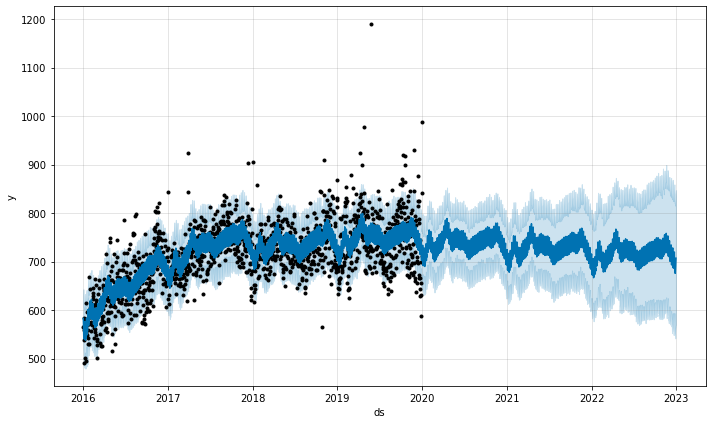

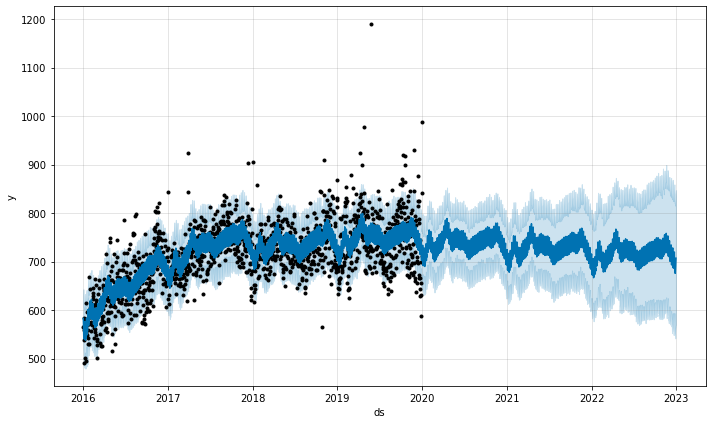

In [14]:
# Plot the forecast vs actuals
model.plot(forecast)

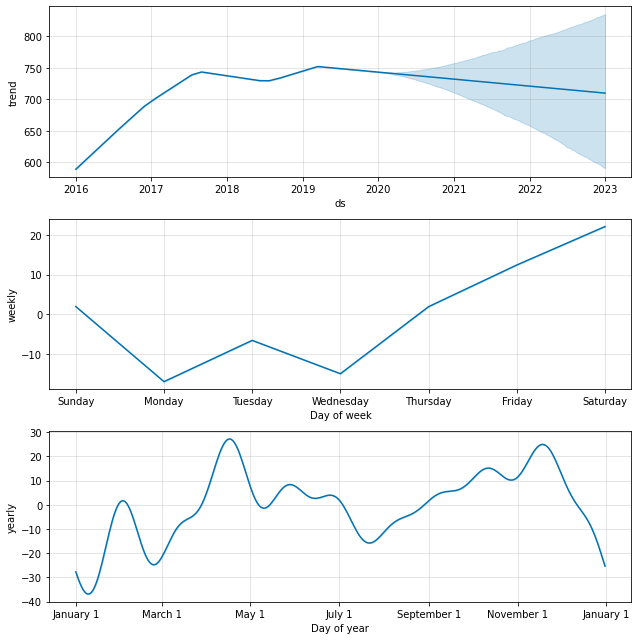

In [15]:
fig = model.plot_components(forecast)

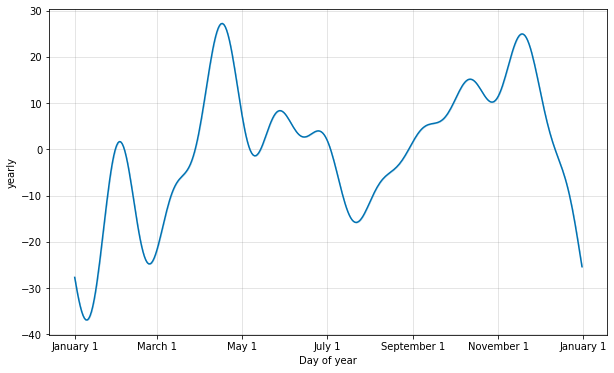

In [16]:
from fbprophet.plot import plot_yearly
plot_yearly(model)

In [ ]:
cv = cross_validation(model, initial='730 days', period='1 day', horizon='1 day')

INFO:fbprophet:Making 727 forecasts with cutoffs between 2018-01-01 00:00:00 and 2019-12-31 00:00:00


In [73]:
cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-01-01,1716.344183,1668.288244,1765.429684,1843.571839,2018-12-31
1,2020-01-01,1705.980222,1642.268254,1762.772532,2072.401077,2019-12-31
